In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#Data Preparation

In [ ]:
# Load the MNIST dataset
mnist = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Convert the dataset into a numpy array
mnist = np.array(mnist)

# Shuffle the dataset
np.random.shuffle(mnist)

# Total number of images in the dataset
total_images = len(mnist)

# Split the dataset into training and testing sets (80%/20%)
train_mnist, test_mnist = mnist[:int(total_images * 0.8)].T, mnist[int(total_images * 0.8):].T

# Split the data into images and labels
train_images, train_labels = train_mnist[1:] / 255, train_mnist[0]
test_images, test_labels = test_mnist[1:] / 255, test_mnist[0]

# Get the number of features (pixels) and images in the training set
n_features, n_images = train_images.shape

# Number of classes (digits)
n_classes = m = 10

#Modelling the Neural Network

In [ ]:
import numpy as np

# Function to initialize W1, W2, b1, b2
def initialize_parameters(n_classes, n_features):
    W1 = np.random.randn(n_classes, n_features) * 0.01
    b1 = np.zeros((n_classes, 1))
    W2 = np.random.randn(n_classes, n_classes) * 0.01
    b2 = np.zeros((n_classes, 1))
    return W1, b1, W2, b2


# Forward propagation function
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)  # Softmax activation
    return A1, A2


# One-hot encoding function
def one_hot(y, n_classes=10):
    one_hot = np.zeros((n_classes, y.shape[0]))
    for i in range(y.shape[0]):
        one_hot[y[i], i] = 1
    return one_hot


# Backward propagation function
def backward(X, Y, A1, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - one_hot(Y)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))  # ReLU derivative
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2


#More Updated Functions

In [ ]:
# Update parameters function
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


# Get prediction function
def get_prediction(X, W1, b1, W2, b2):
    A1, A2 = forward(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)


# Get accuracy function
def get_accuracy(X, Y, W1, b1, W2, b2):
    pred = get_prediction(X, W1, b1, W2, b2)
    accuracy = np.mean(pred == Y)
    return accuracy


# Train function (gradient descent)
def train(X, Y, n_iterations=500, learning_rate=0.1):
    W1, b1, W2, b2 = initialize_parameters(n_classes, n_features)
    for i in range(n_iterations):
        A1, A2 = forward(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward(X, Y, A1, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            accuracy = get_accuracy(X, Y, W1, b1, W2, b2)
            print("Iteration:", i)
            print("Accuracy:", accuracy)
    return W1, b1, W2, b2


# Train Data

In [ ]:
W1, b1, W2, b2 = train(train_images, train_labels, n_iterations=1500, learning_rate=0.2)

Iteration: 0
Accuracy: 0.11479166666666667
Iteration: 10
Accuracy: 0.1262797619047619
Iteration: 20
Accuracy: 0.2949404761904762
Iteration: 30
Accuracy: 0.46148809523809525
Iteration: 40
Accuracy: 0.4949702380952381
Iteration: 50
Accuracy: 0.5633035714285715
Iteration: 60
Accuracy: 0.6885119047619047
Iteration: 70
Accuracy: 0.750297619047619
Iteration: 80
Accuracy: 0.7803571428571429
Iteration: 90
Accuracy: 0.8000892857142857
Iteration: 100
Accuracy: 0.815297619047619
Iteration: 110
Accuracy: 0.8274107142857143
Iteration: 120
Accuracy: 0.8391666666666666
Iteration: 130
Accuracy: 0.849077380952381
Iteration: 140
Accuracy: 0.8574702380952381
Iteration: 150
Accuracy: 0.8637202380952381
Iteration: 160
Accuracy: 0.8691071428571429
Iteration: 170
Accuracy: 0.8738690476190476
Iteration: 180
Accuracy: 0.8780059523809524
Iteration: 190
Accuracy: 0.8815773809523809
Iteration: 200
Accuracy: 0.8847916666666666
Iteration: 210
Accuracy: 0.8866666666666667
Iteration: 220
Accuracy: 0.8892261904761904


#Display The Images

In [ ]:
pred = get_prediction(test_images, W1, b1, W2, b2)
acc = get_accuracy(test_images, test_labels, W1, b1, W2, b2)

print("Accuracy on the test set: {:.2%}".format(acc))

if acc < 0.8:
    print("The model's performance is poor. It needs improvement.")
elif acc < 0.9:
    print("The model's performance is moderate. It shows decent generalization.")
elif acc < 0.95:
    print("The model's performance is good. It generalizes well.")
else:
    print("The model's performance is excellent. It achieves high accuracy.")


Accuracy on the test set: 92.68%
The model's performance is good. It generalizes well.


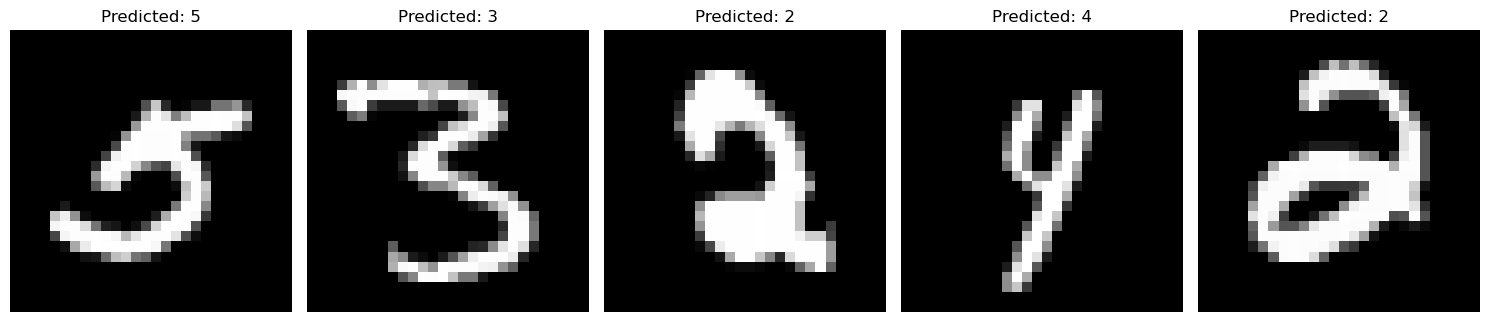

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 4))

for i in range(5):
    r = np.random.randint(0, len(test_images))
    ax[i].imshow(test_images[:, r].reshape(28, 28), cmap='gray')
    ax[i].set_title("Predicted: {}".format(pred[r]))
    ax[i].axis('off')

plt.tight_layout()
plt.show()